# You are given a dataset of demographic data that was extracted from the 1994 Census database. Here is a sample of what the data looks like:

https://replit.com/@VishnuTR/boilerplate-demographic-data-analyzer-1#main.py

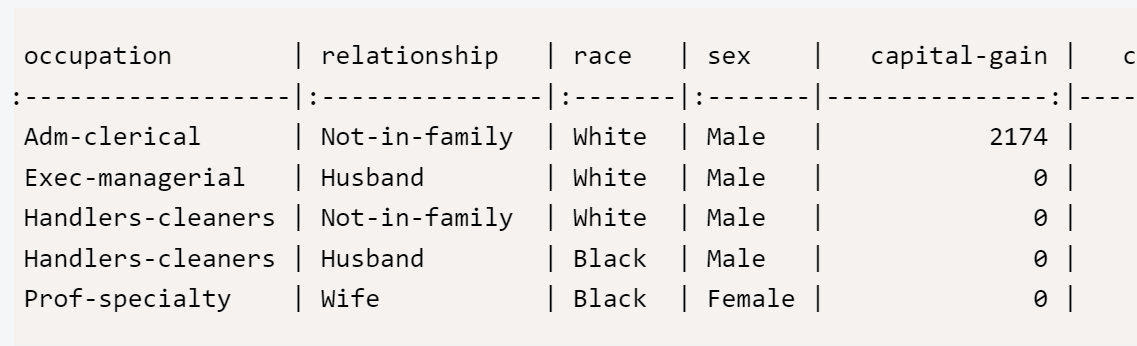

In [1]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('C:/Users/91740/Downloads/adult.data.csv',header = 'infer')

In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.

# race_count = ?

#How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.

In [7]:
#Using pandas way, Series.value_counts()
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [12]:
#Using groupby() & count()
race_count = df.groupby('race').count()
race_count

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
race,,,,,,,,,,,,,,
Amer-Indian-Eskimo,311,311,311,311,311,311,311,311,311,311,311,311,311,311
Asian-Pac-Islander,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039
Black,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124
Other,271,271,271,271,271,271,271,271,271,271,271,271,271,271
White,27816,27816,27816,27816,27816,27816,27816,27816,27816,27816,27816,27816,27816,27816


https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/#:~:text=Python%E2%80%99s%20Transform%20function%20returns%20a%20self-produced%20dataframe%20with,10%20to%20each%20element%20in%20a%20dataframe%3A%20df%3Dpd.

In [15]:
# Add frequecy count as new column to DataFrame
#transform method tranform the column as mentioned
df['freq_count'] = df.groupby('race')['race'].transform('count')
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,freq_count
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,27816
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,27816
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,27816
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3124
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,3124


In [22]:
# Getting value counts of multiple columns
#kind of pivoting
#grouping by two columns and counting
df1 = df.groupby(['race', 'marital-status']).transform('count')
df1.head(5)

,age,workclass,fnlwgt,education,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,freq_count
0,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757
1,13410,13410,13410,13410,13410,13410,13410,13410,13410,13410,13410,13410,13410,13410
2,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797
3,837,837,837,837,837,837,837,837,837,837,837,837,837,837
4,837,837,837,837,837,837,837,837,837,837,837,837,837,837


In [28]:
# Get occurence of value by index (row label)
#index here does not repeat hence we have single(1) count for each index
df1 = df.index.value_counts()
df1

2047     1
32069    1
5416     1
7465     1
1322     1
        ..
15026    1
12979    1
2740     1
693      1
0        1
Length: 32561, dtype: int64

In [30]:
#reading the csv file again because did some operation on the original data file
df = pd.read_csv('C:/Users/91740/Downloads/adult.data.csv',header = 'infer')
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. What is the average age of men? 
    average_age_men = ?

In [38]:
filter_men = df.loc[df['sex'] == 'Male', 'age']
#here filter_men is a sub dataframe created by filter condition
average_age_men = round(filter_men.mean(),1)
average_age_men

39.4

# 3. What is the percentage of people who have a Bachelor's degree? 
    percentage_bachelors = ?   

In [40]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
#display unique values of a column in df
pd.unique(df['education'])

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [46]:
#count how many people belong to each educational background
count_edu = df['education'].value_counts()
count_edu

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [57]:
#created a subset of df where education is only 'Bachelors'
bach = df.loc[df['education'] == 'Bachelors' ]
#counting the number of people with bachelors degree
count_bach = bach['education'].value_counts()
count_bach

Bachelors    5355
Name: education, dtype: int64

In [60]:
#count total number of people in the data set
count_total = count_edu.sum()
count_total

32561

In [61]:
#count_bach/count_total
percentage_bachelors = round((count_bach/count_total)*100,1)
percentage_bachelors

Bachelors    16.4
Name: education, dtype: float64

# 3. solution_different method

In [72]:
#filter_education is a boolean series created by the condition
filter_education = df["education"] == "Bachelors"
#df[filter_education]["education"] is the series with only 'Bachelors'
#count on the above series with bachelors
percentage_bachelors = (
        df[filter_education]["education"].count() * 100 / df["education"].count()
    ).round(1)
percentage_bachelors

16.4

# 4. What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K? 

# With and without `Bachelors`, `Masters`, or `Doctorate`
                higher_education = ?
                lower_education  = ?  

In [76]:
#filter_education is a boolean series created by the condition(Bachelors/Masters/Doctorate)
filter_education = ((df["education"] == "Bachelors")
                    |(df["education"] == "Masters")
                    |(df["education"] == "Doctorate"))

In [79]:
#count on the above series with (Bachelors/Masters/Doctorate)
higher_education = (
        df[filter_education]["education"].count() * 100 / df["education"].count()
    ).round(1)
higher_education

23.0

In [80]:
#count on the above series with (Bachelors/Masters/Doctorate)
#filter condition is reversed with a not sign
lower_education = (
        df[~filter_education]["education"].count() * 100 / df["education"].count()
    ).round(1)
lower_education

77.0

# higher_education_rich = ?

In [82]:
#With Bachelors, Masters, or Doctorate and earning salary > 50K

filter_education = ((df["education"] == "Bachelors")
                    |(df["education"] == "Masters")
                    |(df["education"] == "Doctorate"))
filter_salary = (df["salary"] == ">50K")


0    False
1    False
2    False
3    False
4    False
Name: salary, dtype: bool

In [86]:
#count of rows satifying above conditions
#numerator
df[filter_education].loc[filter_salary]['salary'].count()

3486

In [90]:
#gives the same result as above, syntax different
#numerator
df[filter_education].loc[filter_salary,'salary'].count()

3486

In [95]:
#gives the result where With Bachelors, Masters, or Doctorate in education
#denominator
df[filter_education]["education"].count()

7491

In [102]:
#higher education and rich(>50K)
higher_education_rich = round((
        df[filter_education].loc[filter_salary]['salary'].count() * 100
        )/df[filter_education]["education"].count(),1)
higher_education_rich

46.5

# lower_education_rich = ?

In [103]:
#lower education and rich(>50K)
lower_education_rich = round((
        df[~filter_education].loc[filter_salary]['salary'].count() * 100
        )/df[~filter_education]["education"].count(),1)
lower_education_rich

17.4

# 5.  What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = ? 

In [106]:
#dataframe calling again
#might have changed in the above operations
df = pd.read_csv('C:/Users/91740/Downloads/adult.data.csv',header = 'infer')
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [116]:
#creating a subset dataframe consisting of only 'hours-per-week'column
#applying min on the data frame
min_work_hours = round(df["hours-per-week"].min(),1)
min_work_hours

1

# 6. What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = ?
    rich_percentage = ?

# num_min_workers = ?

In [118]:
#created a boolean series using the below condition statement
filter_min_hour_wrkrs = df["hours-per-week"] == round(df["hours-per-week"].min(),1)
filter_min_hour_wrkrs

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: hours-per-week, Length: 32561, dtype: bool

In [124]:
#workers working for excatly 1 (min hours) per week
num_min_workers = df[filter_min_hour_wrkrs]['hours-per-week'].count()
num_min_workers

20

# rich_percentage = ?

In [126]:
#filter for rich ie, >50K
filter_rich = df["salary"] == '>50K'
filter_rich

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: salary, Length: 32561, dtype: bool

In [134]:
#workers working min(1) hour-per week and earning >50K
#apply bothe above filters created on the dataframe
rich_percentage = (
                    df[filter_min_hour_wrkrs].loc[filter_rich]['salary'].count() * 100
                  )/num_min_workers
rich_percentage


10.0

# 7.What country has the highest percentage of people that earn >50K?
    highest_earning_country = ?
    highest_earning_country_percentage = ?


# highest_earning_country = ?

In [135]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [152]:
#display unique values of salary column in df
pd.unique(df['salary'])

array(['<=50K', '>50K'], dtype=object)

In [157]:
#numerator- filter the dataframe based on salary >50K and applying to 'native-country' and value_count on the series
#denominator- native-country value count
wealthy_country_percent = (df[df["salary"] == ">50K"]["native-country"].value_counts() 
                        / df["native-country"].value_counts())*100
wealthy_country_percent

?                             25.042882
Cambodia                      36.842105
Canada                        32.231405
China                         26.666667
Columbia                       3.389831
Cuba                          26.315789
Dominican-Republic             2.857143
Ecuador                       14.285714
El-Salvador                    8.490566
England                       33.333333
France                        41.379310
Germany                       32.116788
Greece                        27.586207
Guatemala                      4.687500
Haiti                          9.090909
Holand-Netherlands                  NaN
Honduras                       7.692308
Hong                          30.000000
Hungary                       23.076923
India                         40.000000
Iran                          41.860465
Ireland                       20.833333
Italy                         34.246575
Jamaica                       12.345679
Japan                         38.709677


In [159]:
#dataframe.idxmax () function returns index of first occurrence of maximum over requested axis.
#DataFrame.idxmax(axis=0, skipna=True)
highest_earning_country = wealthy_country_percent.idxmax()
highest_earning_country

'Iran'

# highest_earning_country_percentage = ?

In [161]:
highest_earning_country_percentage = round(wealthy_country_percent.max(),1)
highest_earning_country_percentage

41.9

# 8. Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = ?


# top_IN_occupation = ?

In [162]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [163]:
filter_india = df['native-country'] == 'India'
filter_salary = df['salary'] == '>50K'

In [173]:
#top_IN_occupation
occupation_count = df[filter_india].loc[filter_salary]['occupation'].value_counts()
top_IN_occupation = occupation_count.idxmax()
top_IN_occupation

'Prof-specialty'

In [170]:
#an example of adding more and more filter conditions
#filter_india & filter salary defined above
#sex == 'Male' is defined in the condition itself
df[filter_india].loc[filter_salary].loc[df['sex'] == 'Male']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K
11260,54,Private,225599,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,7298,0,40,India,>50K
